In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('data/FAO.csv', encoding = 'latin-1')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [3]:
df1 = df1.loc[:, ['Area', 'Unit', 'Element', 'Item', 'Y2013']]
df1

,Area,Unit,Element,Item,Y2013
0,Afghanistan,1000 tonnes,Food,Wheat and products,4895
1,Afghanistan,1000 tonnes,Food,Rice (Milled Equivalent),422
2,Afghanistan,1000 tonnes,Feed,Barley and products,360
3,Afghanistan,1000 tonnes,Food,Barley and products,89
4,Afghanistan,1000 tonnes,Feed,Maize and products,200
...,...,...,...,...,...
21472,Zimbabwe,1000 tonnes,Food,Milk - Excluding Butter,451
21473,Zimbabwe,1000 tonnes,Feed,"Fish, Seafood",15
21474,Zimbabwe,1000 tonnes,Food,"Fish, Seafood",40
21475,Zimbabwe,1000 tonnes,Food,"Aquatic Products, Other",0


In [4]:
df1 = df1[(df1.Area=='China, mainland') |
         (df1.Area=='United States of America') |
         (df1.Area=='India') |
         (df1.Area=='Poland') |
         (df1.Area=='Senegal')|
         (df1.Area=='Venezuela (Bolivarian Republic of)')]
df1

,Area,Unit,Element,Item,Y2013
4120,"China, mainland",1000 tonnes,Feed,Wheat and products,26628
4121,"China, mainland",1000 tonnes,Food,Wheat and products,87783
4122,"China, mainland",1000 tonnes,Feed,Rice (Milled Equivalent),12052
4123,"China, mainland",1000 tonnes,Food,Rice (Milled Equivalent),108321
4124,"China, mainland",1000 tonnes,Feed,Barley and products,23
...,...,...,...,...,...
21003,Venezuela (Bolivarian Republic of),1000 tonnes,Food,Milk - Excluding Butter,3582
21004,Venezuela (Bolivarian Republic of),1000 tonnes,Feed,"Fish, Seafood",41
21005,Venezuela (Bolivarian Republic of),1000 tonnes,Food,"Fish, Seafood",291
21006,Venezuela (Bolivarian Republic of),1000 tonnes,Food,"Aquatic Products, Other",0


In [5]:
df1[(df1.Item == 'Wheat and products') & (df1.Area == 'Japan')]

,Area,Unit,Element,Item,Y2013


In [6]:
df1 = df1[(df1.Element == 'Food')]

In [7]:
df1[(df1.Item == 'Wheat and products') & (df1.Area == 'Japan')]

,Area,Unit,Element,Item,Y2013


In [11]:
people_in_thousands = {'Japan':128542, 
                       'United States of America':309011, 
                       'India':1234281, 
                       'Norway':4885, 
                       'Senegal':12678,
                      'Poland':38040,
                      'China, mainland': 1357000,
                      'Venezuela (Bolivarian Republic of)': 29780}

In [12]:
df1['kg/(person*year)']  = df1.apply(lambda row: row.Y2013*1000/people_in_thousands[row.Area], axis = 1)

C:\Users\grzes\AppData\Local\Temp/ipykernel_10712/651575276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['kg/(person*year)']  = df1.apply(lambda row: row.Y2013*1000/people_in_thousands[row.Area], axis = 1)


In [13]:
import numpy as np
np.unique(df1.Item)

array(['Alcoholic Beverages', 'Animal fats', 'Apples and products',
       'Aquatic Animals, Others', 'Aquatic Plants',
       'Aquatic Products, Other', 'Bananas', 'Barley and products',
       'Beans', 'Beer', 'Beverages, Alcoholic', 'Beverages, Fermented',
       'Bovine Meat', 'Butter, Ghee', 'Cassava and products',
       'Cephalopods', 'Cereals - Excluding Beer', 'Cereals, Other',
       'Citrus, Other', 'Cloves', 'Cocoa Beans and products',
       'Coconut Oil', 'Coconuts - Incl Copra', 'Coffee and products',
       'Cottonseed Oil', 'Cream', 'Crustaceans', 'Dates', 'Demersal Fish',
       'Eggs', 'Fats, Animals, Raw', 'Fish, Body Oil', 'Fish, Liver Oil',
       'Fish, Seafood', 'Freshwater Fish', 'Fruits - Excluding Wine',
       'Fruits, Other', 'Grapefruit and products',
       'Grapes and products (excl wine)', 'Groundnut Oil',
       'Groundnuts (Shelled Eq)', 'Honey', 'Infant food',
       'Lemons, Limes and products', 'Maize Germ Oil',
       'Maize and products', 'Marine

c:\users\grzes\desktop\twd-projekt-1\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


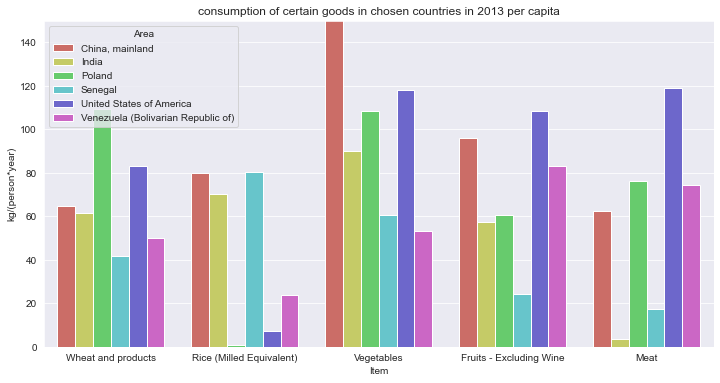

In [14]:
%matplotlib inline
sns.set_style("darkgrid")
#for country in ['Japan', 'United States of America', 'Norway', 'Senegal', 'India']:
dfcountry = df1[((df1.Item == 'Meat')|
                (df1.Item == 'Fruits - Excluding Wine')|
                (df1.Item == 'Vegetables')|
                (df1.Item == 'Wheat and products')|
                (df1.Item == 'Rice (Milled Equivalent)'))]
plt.figure(figsize=(12,6))
ax = sns.barplot(dfcountry['Item'],
            dfcountry['kg/(person*year)'],
            hue = dfcountry['Area'],
            orient = 'v',
            palette = sns.color_palette("hls"))
ax.set(ylim=(0, 150))



plt.title('consumption of certain goods in chosen countries in 2013 per capita')
plt.savefig('./plots/jedzonko_lepsze.png')

c:\users\grzes\desktop\twd-projekt-1\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


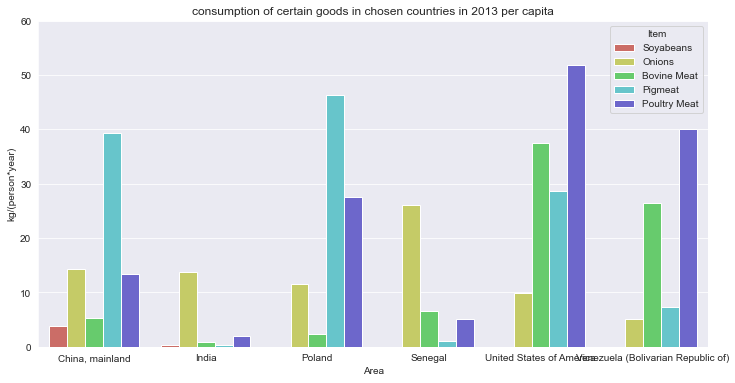

In [15]:
sns.set_style("darkgrid")
#for country in ['Japan', 'United States of America', 'Norway', 'Senegal', 'India']:
dfcountry = df1[((df1.Item == 'Onions')|
                (df1.Item == 'Bovine Meat')|
                (df1.Item == 'Pigmeat')|
                (df1.Item == 'Poultry Meat')|
                (df1.Item == 'Soyabeans'))]
plt.figure(figsize=(12,6))
ax = sns.barplot(dfcountry['Area'],
            dfcountry['kg/(person*year)'],
            hue = dfcountry['Item'],
            orient = 'v',
            palette = sns.color_palette("hls"))
ax.set(ylim=(0, 60))



plt.title('consumption of certain goods in chosen countries in 2013 per capita')
plt.savefig('./plots/jedzonko.png')

In [16]:
import matplotlib.pyplot as plt
from math import pi

# Set data
df = pd.DataFrame({
    'var1': [38, 1.5, 30, 4],
    'var2': [29, 10, 9, 34],
    'var3': [8, 39, 23, 24],
    'var4': [7, 31, 33, 14],
    'var5': [28, 15, 32, 14]
})

def spider(df, country):
    categories=list(df)
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[0].values.flatten().tolist()
    values += values[:1]
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    plt.figure(figsize=(20,10))
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels
    #ax.set_rlabel_position(1000)
    plt.xticks(angles[:-1], categories, color='grey', size=20)

    XTICKS = ax.xaxis.get_major_ticks()
    for tick in XTICKS:
        tick.set_pad(70)
# Draw ylabels
    #ax.set_rlabel_position(0)
    plt.yticks([15, 30, 45, 60], ["15", "30", "45", "60"], color="grey", size=20)
    plt.ylim(0,60)

    # Plot data
    ax.plot(angles, values, linewidth=5, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.3)
    plt.title(country, size = 40)
    # Show the graph
    return plt

dfcountry

,Area,Unit,Element,Item,Y2013,kg/(person*year)
4160,"China, mainland",1000 tonnes,Food,Soyabeans,5072,3.737657
4184,"China, mainland",1000 tonnes,Food,Onions,19327,14.242447
4208,"China, mainland",1000 tonnes,Food,Bovine Meat,7089,5.224024
4210,"China, mainland",1000 tonnes,Food,Pigmeat,53247,39.238762
4211,"China, mainland",1000 tonnes,Food,Poultry Meat,18284,13.473839
9065,India,1000 tonnes,Food,Soyabeans,484,0.392131
9088,India,1000 tonnes,Food,Onions,16874,13.671117
9111,India,1000 tonnes,Food,Bovine Meat,1017,0.823961
9113,India,1000 tonnes,Food,Pigmeat,354,0.286807
9114,India,1000 tonnes,Food,Poultry Meat,2352,1.905563


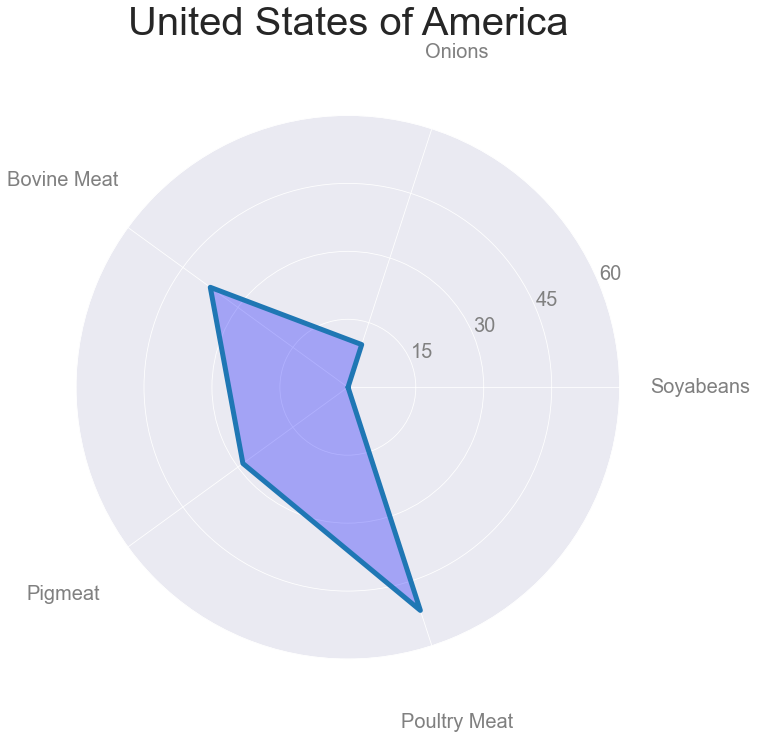

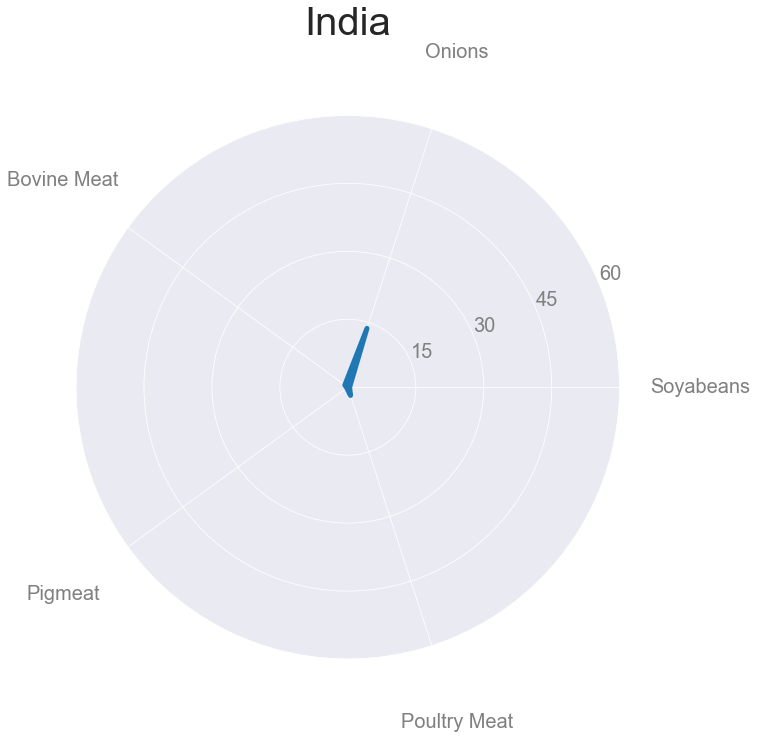

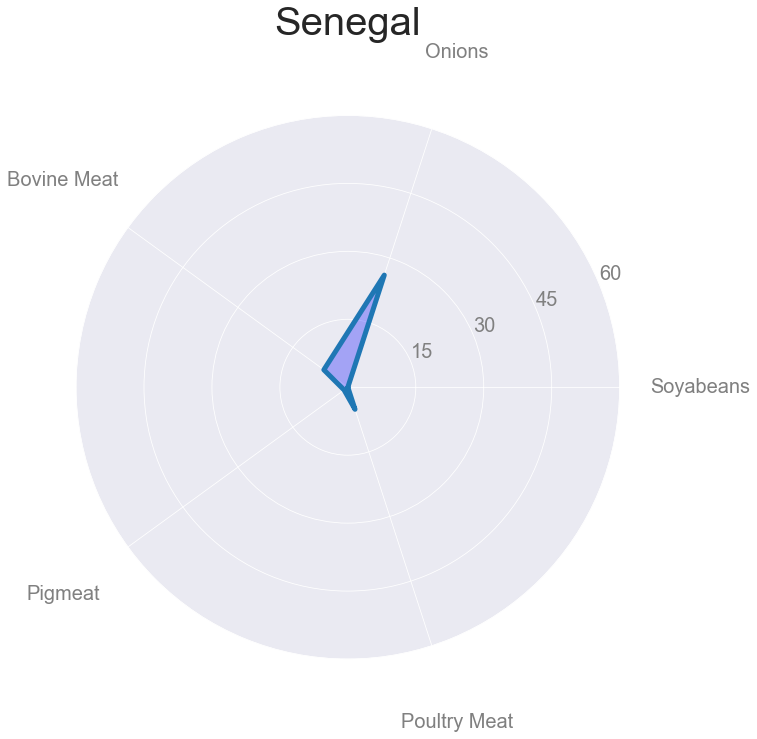

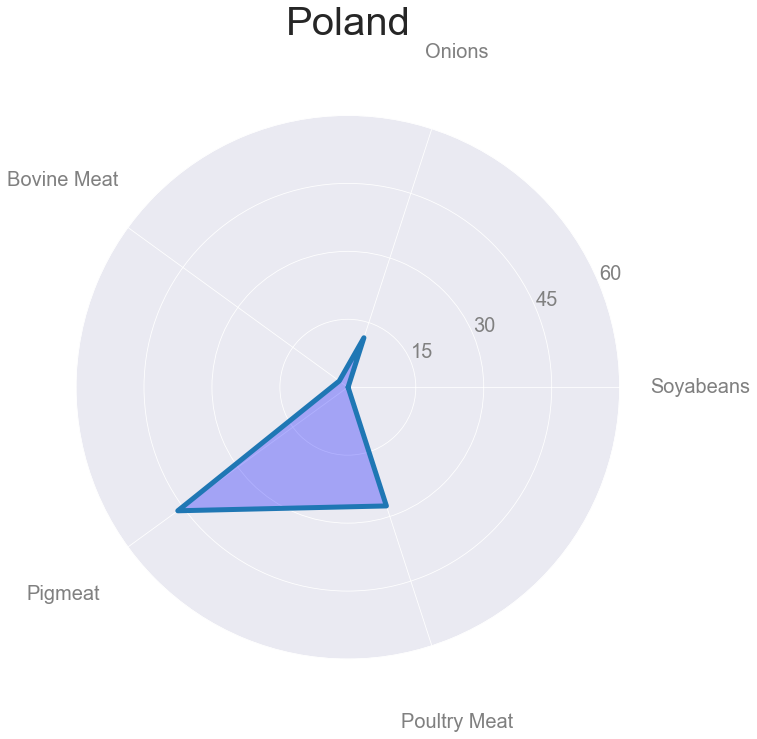

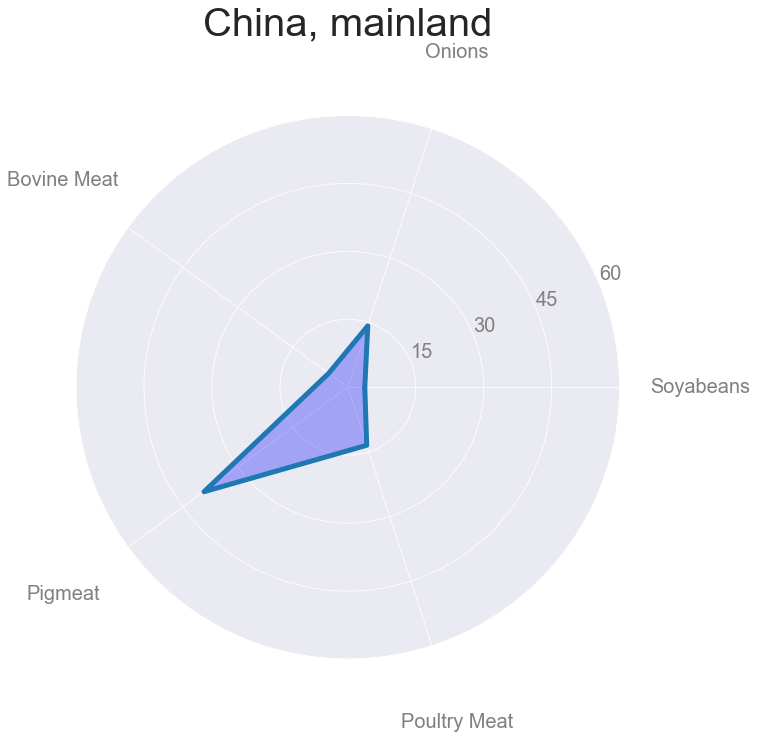

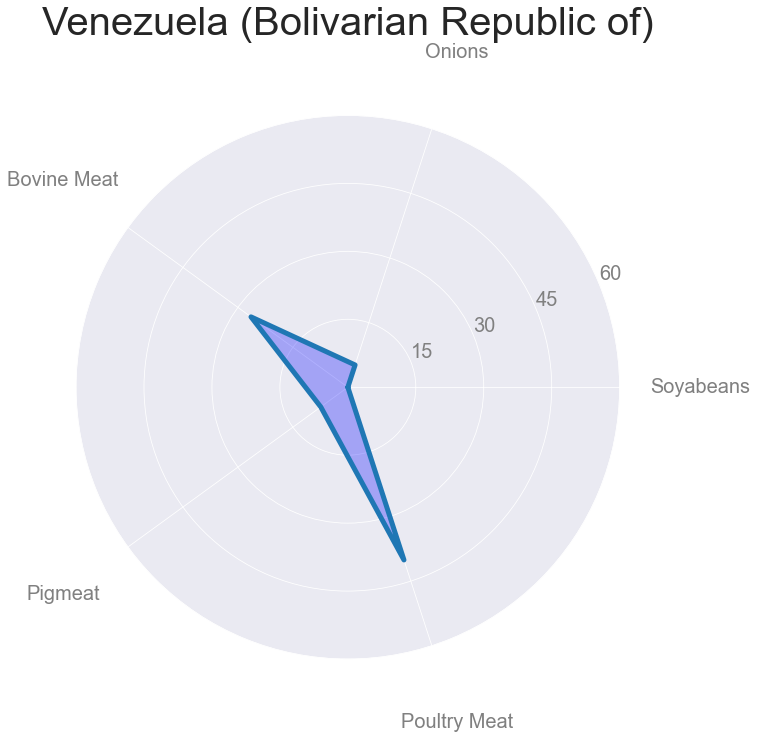

In [17]:
people_in_thousands = {'United States of America':309011, 
                       'India':1234281, 
                       'Senegal':12678,
                      'Poland':38040,
                      'China, mainland': 1357000,
                      'Venezuela (Bolivarian Republic of)': 29780}
for country in people_in_thousands.keys():
    df_test = dfcountry[dfcountry.Area == country]

    df_test = pd.DataFrame(df_test.values[:,[3,5]].transpose())
    df_test.columns = df_test.iloc[0]
    
    df_test = df_test[1:].reset_index().drop('index', axis =1)
    spider(df_test, country).savefig('./plots/radar_plotsjajuszko/'+country+'.svg', bbox_inches='tight')
